In [1]:
# imports and style setting
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm 
import arviz as az
sns.set_style("darkgrid")

# Chapter 4: Generalising Linear Models

C3: we used a linear combo of input vars to predict the mean of output var. We assumed the mean was Gaussian distributed.

Some times this isn't appropriate. This chapter looks at those circumstances.

Sections in this chapter:
* Generalised Linear Models
* Logistic Regression (LR), inverse link funcs
* Simple LogR
* Multiple LogR
* Softmax
* Multinomial LogR
* Poisson Regression (PoisR)
* Zero inflated PoisR

We saw in the last chapter that we predicted the mean of an output variable with

$$\mu = \alpha + \beta x$$

This is a sepcial case of

$$\mu = f(\alpha + X\beta)$$

Where $f$ is the **inverse link function**. For LinR the ILF was just the identity function.

##  Categorical variables
Categoricals are not well modelled by Gaussians. If you change your likelyhood distribution, you also need to change how you model the parameters of that distribution - the mean value of a normal distribution can take any real value, so you parameter distribution needs in theory to be able to return any real value.

We can achieve this with the ILF, letting us transform the output as required.

## Logistic Regression
Regression is about predicting a continuous value to an output variable from input variables. Classification is about assigning a discrete value to an output variable from an input variable.

LogR, despite its name, is generally used for classification problems, not regression problems.

Our ILF is 

$$logistic(z) = \frac{1}{1+e^{-z}}$$

The key characteristic is that out result will always be in the [0,1] interval. It has a distinctive S shape

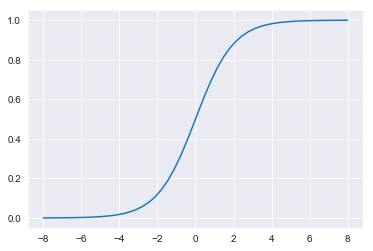

In [2]:
# plot of the logistic function
z = np.linspace(-8, 8)
plt.plot(z, 1 / (1 + np.exp(-z)))

## Simple Logistic Regression
Start with a case of 2 classes. First codify the classes by saying the predicted variable $y \in \{0,1\}$

The difference between this and the coin flipping model is that instead of $\theta$ being generated from a Beta distribution, $\theta$ will be a linear model with the logistic as the ILF.

$$\theta = logistic(\alpha + x\beta)$$

$$y \sim Bern(\theta)$$

### The Iris dataset
We'll pull in the data and visually inspect it.

In [3]:
# pull in data and check
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


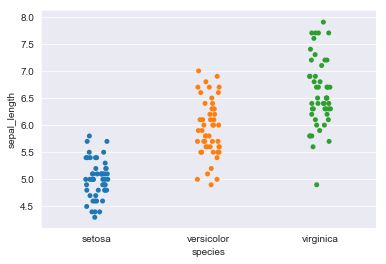

In [4]:
# plot sepal_length by species
sns.stripplot(x="species", y="sepal_length", 
              data=iris, jitter=True)

C:\Users\jlezala\AppData\Local\Continuum\miniconda3\envs\bayes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


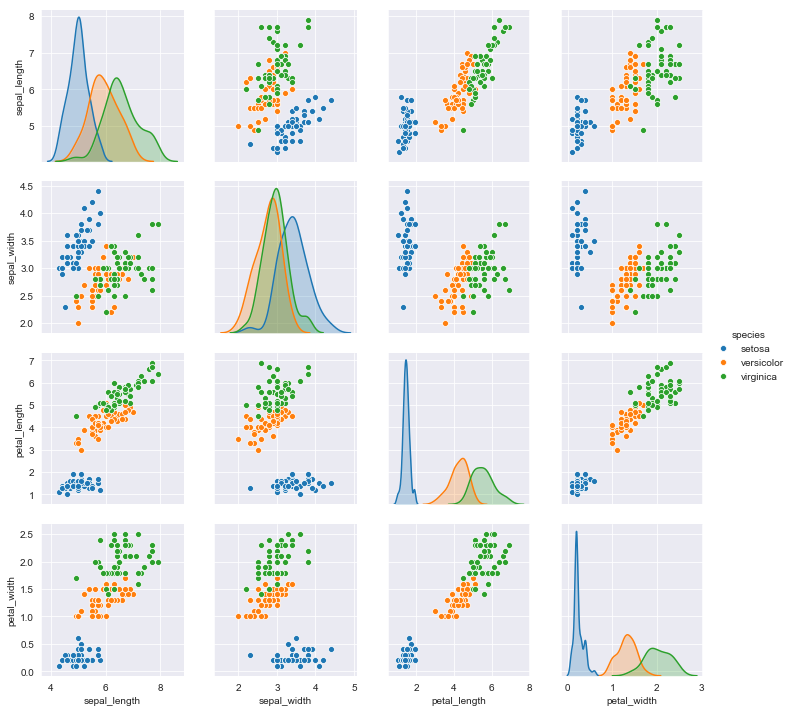

In [ ]:
# plot a scatter matrix
sns.pairplot(iris, hue='species', diag_kind='kde')

The simplest possible classification problem is with 2 classes and 1 input variable.

Take setosa and versicolor classes by sepal_length

In [ ]:
# prepare the data: filter, create cats, center.
df = iris.query("species == ('setosa','versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_0 = df['sepal_length'].values
x_c = x_0 - x_0.mean()

In [ ]:
# define the model 
with pm.Model() as model:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + pm.math.dot(x_c, β)
    # logistic function is aka sigmoid
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    y1 = pm.Bernoulli('y1', p=θ, observed = y_0)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|███████████████| 3000/3000 [00:06<00:00, 467.44draws/s]


In [ ]:
az.plot_trace(trace)
plt.show()

In [ ]:
az.summary(trace)